Parameters:
    K = 2, A = 0.5, L = 4, B = 1
Initial Conditions:
    X(0) = 3, Y(0) = 10
Time Interval:
    Initial Value: t = 0, Final Value: t = 20


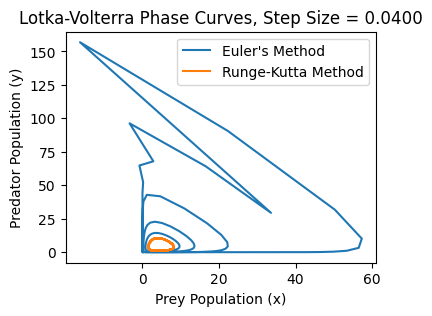

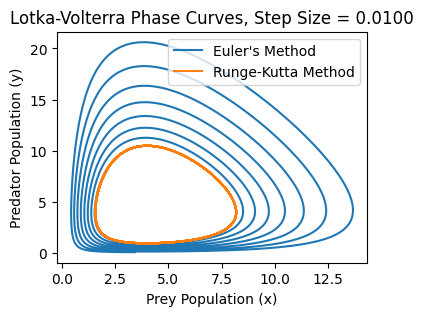

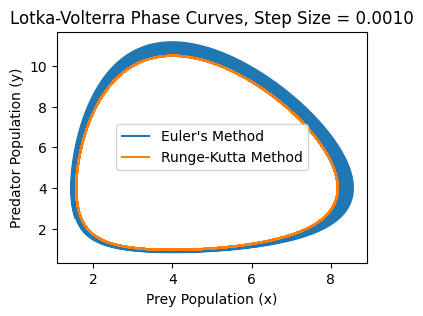

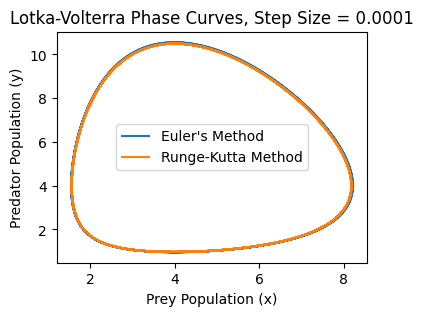

In [25]:
import numpy as np
import matplotlib.pyplot as plt

k = 2
a = 0.5
l = 4
b = 1

x0, y0 = 3, 10
t0, tf = 0, 20

def lotka_volterra(x, y):
    dxdt = k * x - a * x * y
    dydt = -l * y + b * x * y
    return dxdt, dydt

def euler_method(delta):
    num_steps = int((tf - t0) / delta)
    x_values, y_values = [x0], [y0]
    x, y = x0, y0
    for _ in range(num_steps):
        dxdt, dydt = lotka_volterra(x, y)
        x = x + dxdt * delta
        y = y + dydt * delta
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

def rungekutta(delta):
    num_steps = int((tf - t0) / delta)
    x_values, y_values = [x0], [y0]
    x, y = x0, y0
    for _ in range(num_steps):
        k1x, k1y = lotka_volterra(x, y)
        k2x, k2y = lotka_volterra(x + 0.5 * k1x * delta, y + 0.5 * k1y * delta)
        k3x, k3y = lotka_volterra(x + 0.5 * k2x * delta, y + 0.5 * k2y * delta)
        k4x, k4y = lotka_volterra(x + k3x * delta, y + k3y * delta)
        
        x = x + (delta / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y = y + (delta / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

deltas = [0.04, 0.01, 0.001, 0.0001]


print("Parameters:\n    K = 2, A = 0.5, L = 4, B = 1\nInitial Conditions:\n    X(0) = 3, Y(0) = 10\nTime Interval:\n    Initial Value: t = 0, Final Value: t = 20")
for delta in deltas:
    x_euler, y_euler = euler_method(delta)
    x_rungekutta, y_rungekutta = rungekutta(delta)

    plt.figure(figsize=(4, 3))
    plt.plot(x_euler, y_euler, label = "Euler's Method")
    plt.plot(x_rungekutta, y_rungekutta, label = 'Runge-Kutta Method')

    plt.title(f'Lotka-Volterra Phase Curves, Step Size = {delta:.4f}')
    plt.xlabel('Prey Population (x)')
    plt.ylabel('Predator Population (y)')
    plt.legend()
    plt.show()